In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from wordcloud import WordCloud
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# from google.colab import files
# uploaded = files.upload()

In [ ]:
train_path="/content/drive/MyDrive/CODSOFT/Project-1/Genre Classification Dataset/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [ ]:
print(train_data.head())

                                Title       Genre  \
1       Oscar et la dame rose (2009)       drama    
2                       Cupid (1997)    thriller    
3   Young, Wild and Wonderful (1980)       adult    
4              The Secret Sin (1915)       drama    
5             The Unrecovered (2007)       drama    

                                         Description  
1   Listening in to a conversation between his do...  
2   A brother and sister with a past incestuous r...  
3   As the bus empties the students for their fie...  
4   To help their unemployed father make ends mee...  
5   The film's title refers not only to the un-re...  


In [ ]:
print(train_data.describe())

                                 Title    Genre  \
count                            54214    54214   
unique                           54214       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1    13613   

                                              Description  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the American academy ...  
freq                                                   12  


Data Pre-Processing

In [ ]:
train_data.isnull().sum()


Title          0
Genre          0
Description    0
dtype: int64

In [ ]:
train_data = train_data.dropna()

In [ ]:
test_path="/content/drive/MyDrive/CODSOFT/Project-1/Genre Classification Dataset/test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')

In [ ]:
print(test_data.head())

   Id                          Title  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                         Description  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...  


In [ ]:
print(test_data.describe())

                 Id
count  54200.000000
mean   27100.500000
std    15646.336632
min        1.000000
25%    13550.750000
50%    27100.500000
75%    40650.250000
max    54200.000000


In [ ]:
test_data.isnull().sum()

Id             0
Title          0
Description    0
dtype: int64

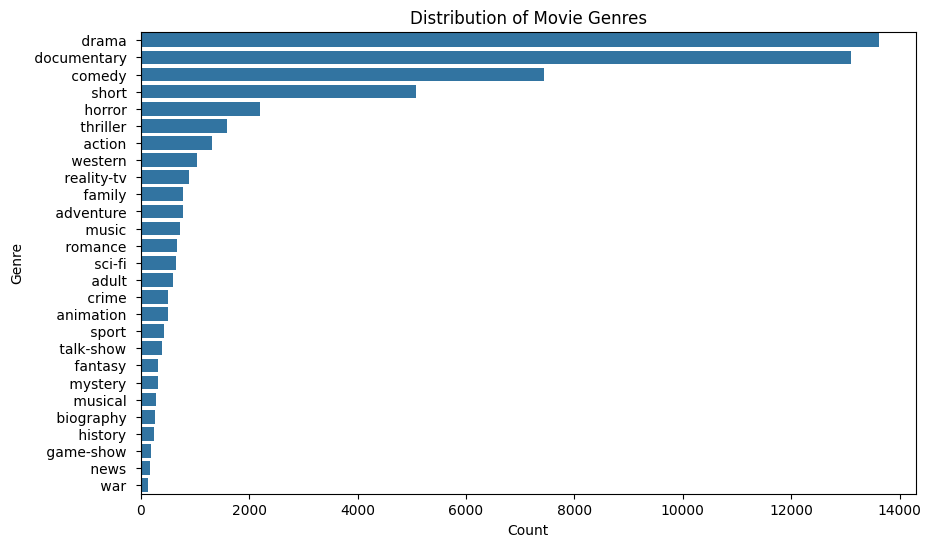

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y=train_data['Genre'].values, order=train_data['Genre'].value_counts().index)
plt.title('Distribution of Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

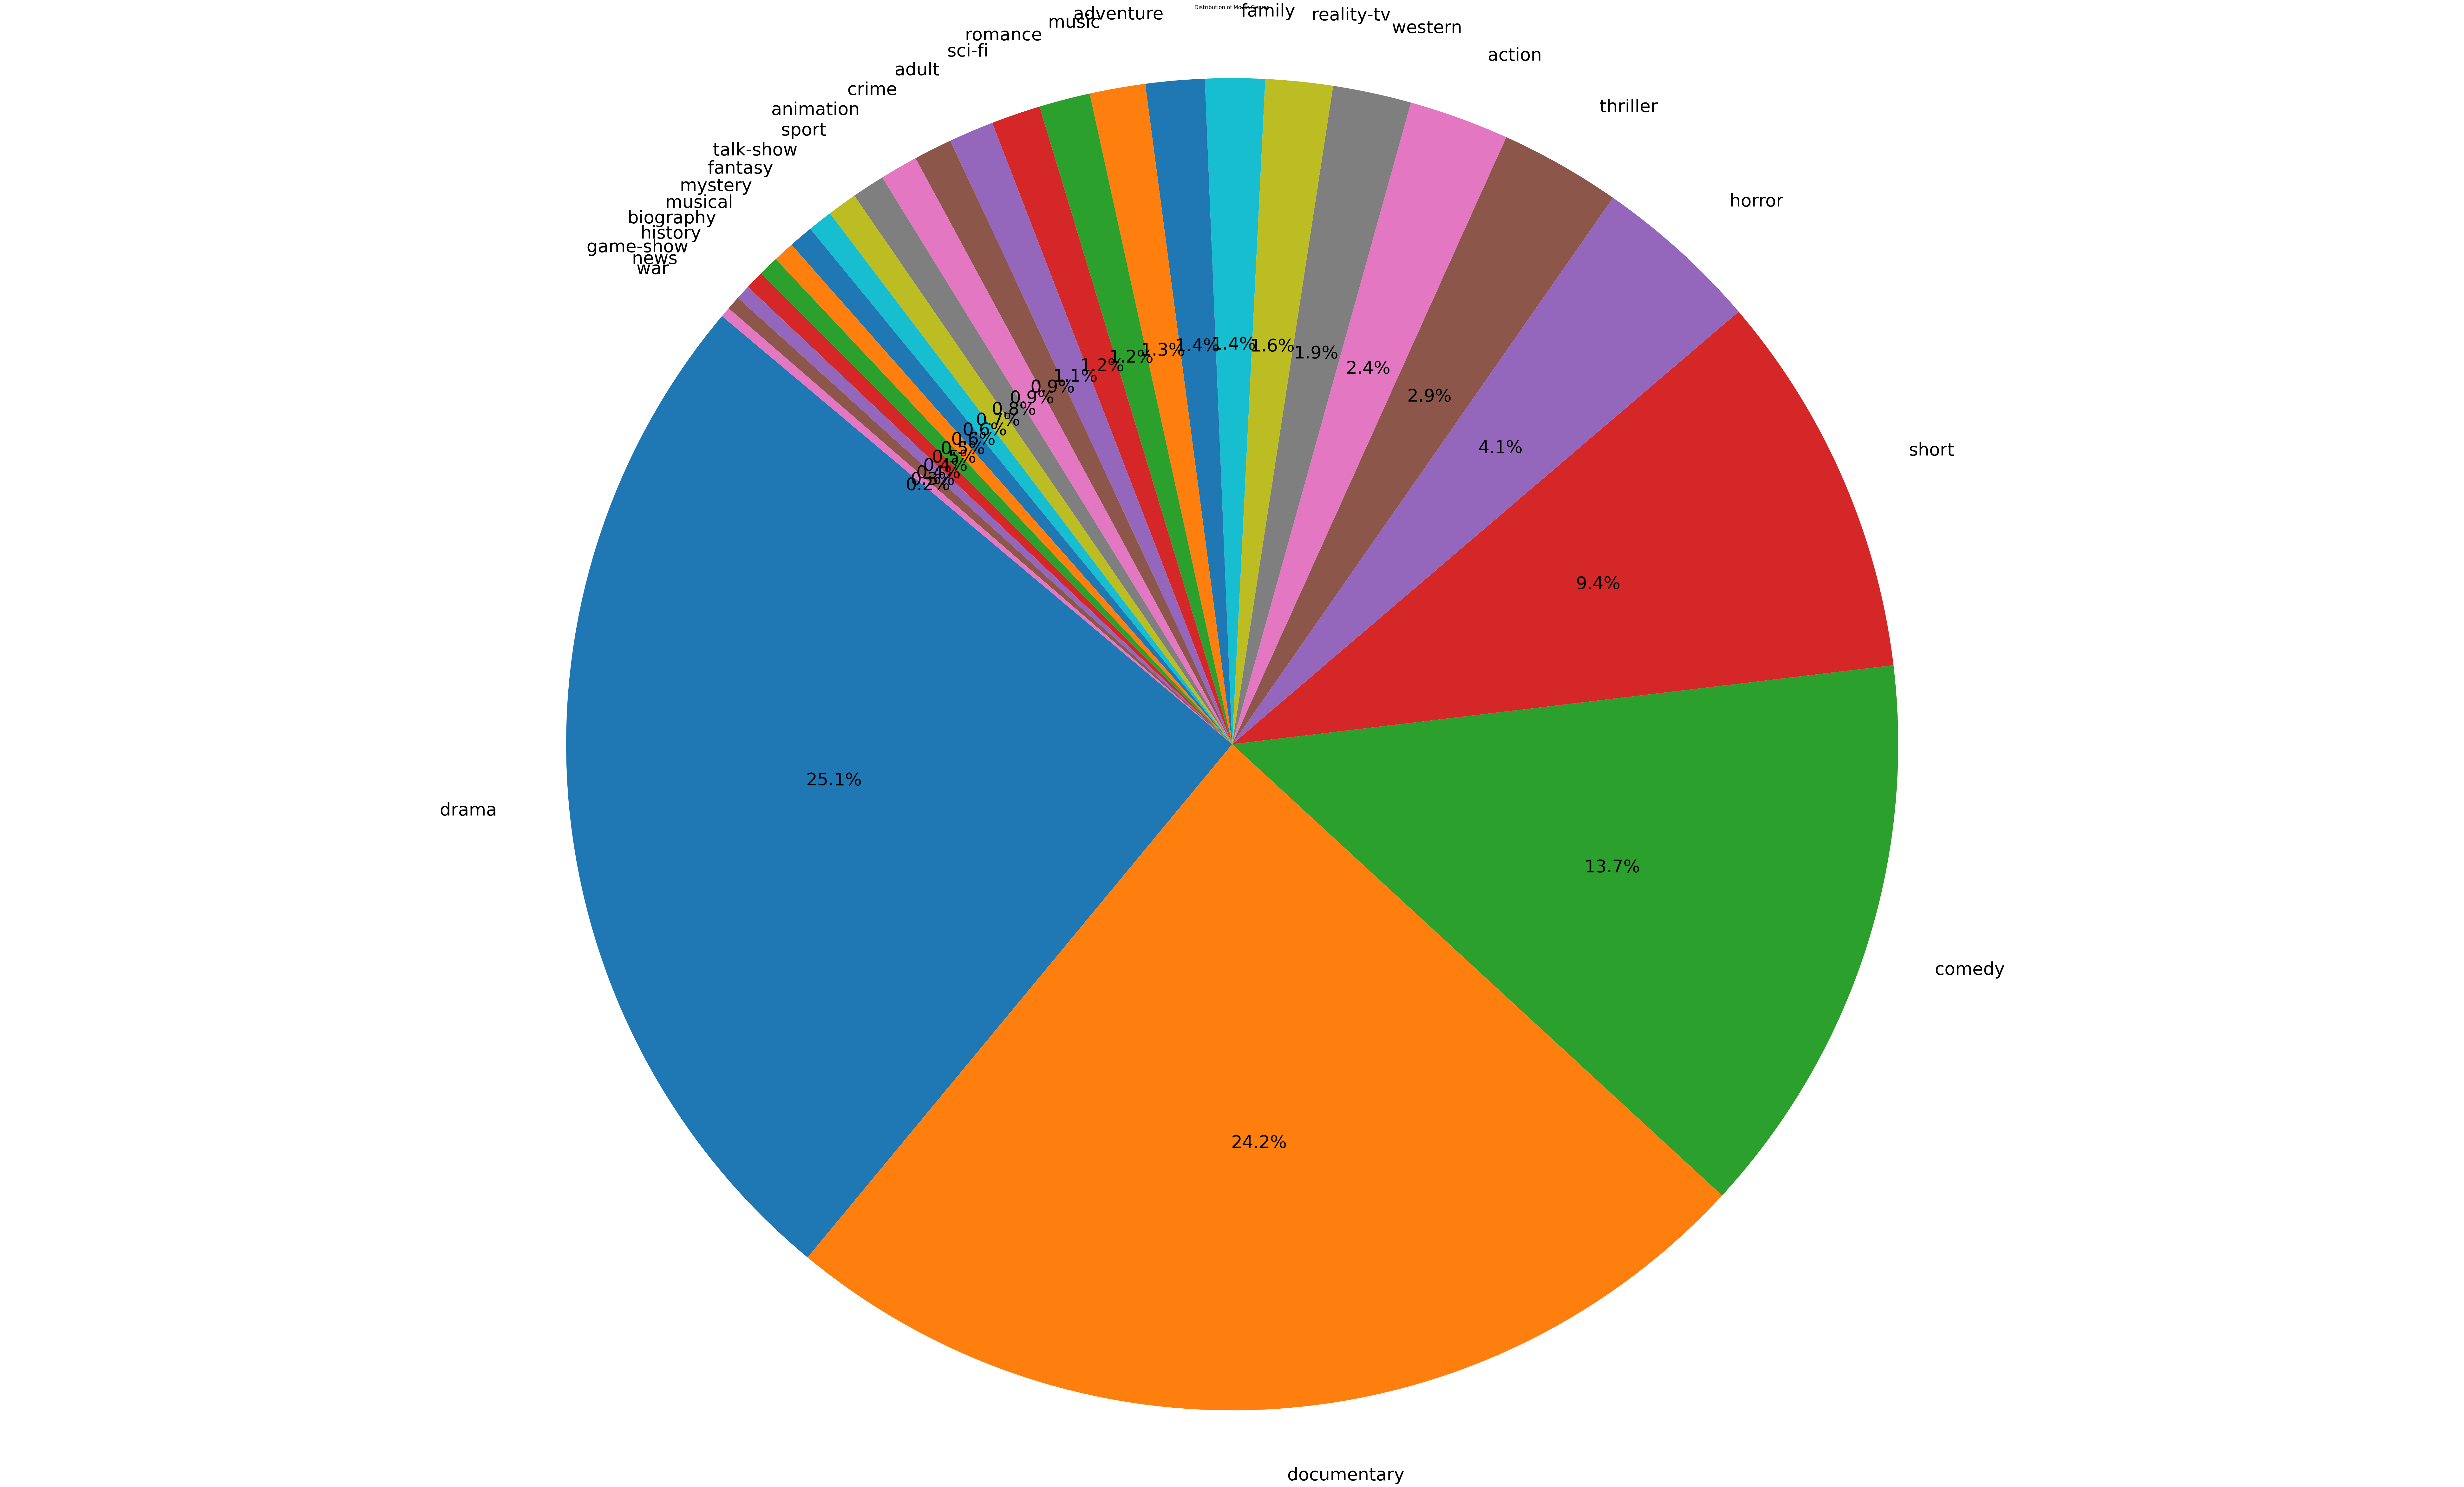

In [ ]:
genre_counts = train_data['Genre'].value_counts()
plt.figure(figsize=(100, 60))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140,textprops={'fontsize': 40})
plt.title('Distribution of Movie Genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    text = ' '.join(words)

    return text

# Apply the text cleaning function to the review column
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)


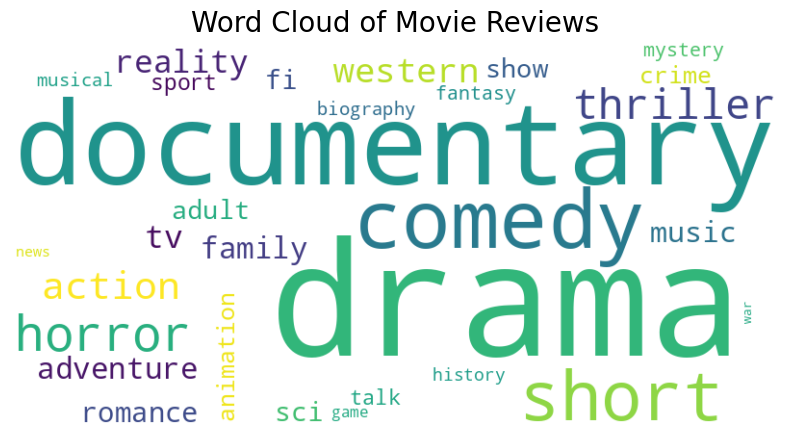

In [ ]:
all_reviews = ' '.join(train_data['Genre'])
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200, collocations=False).generate(all_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.title('Word Cloud of Movie Reviews', fontsize=20)
plt.show()

In [ ]:
# Split the dataset into training and testing sets
X = train_data['Text_cleaning']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_data['Genre'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a pipeline that combines TF-IDF Vectorizer with Naive Bayes Classifier
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)
# Predict the genres for the test set
y_pred_nb = model.predict(X_test)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))



Naive Bayes Accuracy: 0.44341971779027944
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       263
           1       0.00      0.00      0.00       112
           2       0.00      0.00      0.00       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.70      0.04      0.07      1443
           6       0.00      0.00      0.00       107
           7       0.53      0.90      0.67      2659
           8       0.38      0.88      0.53      2697
           9       0.00      0.00      0.00       150
          10       0.00      0.00      0.00        74
          11       0.00      0.00      0.00        40
          12       0.00      0.00      0.00        45
          13       0.00      0.00      0.00       431
          14       0.00      0.00      0.00       144
          15       0.00      0.00      0.00        50
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Logistic Regression
pipeline_lr = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=1000))
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.5812044637093056
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.24      0.33       263
           1       0.81      0.19      0.30       112
           2       0.47      0.13      0.20       139
           3       0.50      0.02      0.04       104
           4       0.00      0.00      0.00        61
           5       0.52      0.59      0.56      1443
           6       0.20      0.01      0.02       107
           7       0.66      0.86      0.75      2659
           8       0.53      0.80      0.64      2697
           9       0.48      0.07      0.12       150
          10       0.00      0.00      0.00        74
          11       0.88      0.35      0.50        40
          12       0.00      0.00      0.00        45
          13       0.66      0.57      0.61       431
          14       0.66      0.44      0.53       144
          15       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Support Vector Machine
pipeline_svm = make_pipeline(TfidfVectorizer(), SVC(kernel='linear'))
pipeline_svm.fit(X_train, y_train)
y_pred_svm = pipeline_svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.5970672323157797
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.35      0.41       263
           1       0.79      0.43      0.55       112
           2       0.51      0.23      0.32       139
           3       0.52      0.12      0.20       104
           4       0.00      0.00      0.00        61
           5       0.53      0.62      0.57      1443
           6       0.46      0.06      0.10       107
           7       0.69      0.84      0.76      2659
           8       0.55      0.77      0.64      2697
           9       0.47      0.12      0.19       150
          10       0.67      0.05      0.10        74
          11       0.88      0.53      0.66        40
          12       0.00      0.00      0.00        45
          13       0.67      0.65      0.66       431
          14       0.67      0.54      0.60       144
          15       0.60      0.06      0.11        50
          16       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# import joblib

# # Save the model to a file
# joblib.dump(model, 'movie_genre_classifier.pkl')

# # Load the model from the file (for future use)
# # model = joblib.load('movie_genre_classifier.pkl')
